# Analyze A/B Testing

This project will analyse the results of an A/B test run by an e-commerce website to comprehend if new web page, developed by the company, "converted" users to the new page. Converted in other words means increased the number of users who decided to pay for the company's product. The goal of the project is to analyse if the company should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

## Section 1 - Probability

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
# Data was uploaded
df = pd.read_csv("ab_data.csv")
df.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

Definition clearity of control and treatment groups

Control group is a comparison group which was used in the experiment as a way to ensure that the experiment actually works. Under control group, the test is carried out under normal or standard circumsances. Whereas, under treatment group, the test is carried out under the experiment treatment (test) circumstances.

In [3]:
# First element shows number of rows in this case there are 294478 rows/users
df.shape

(294478, 5)

In [4]:
# There are 290584 unique users from total users.
df.user_id.nunique()

290584

In [5]:
#The number of times the new_page and treatment don't match.
#Subtract total users from unique users
294478 - 290585

3893

In [8]:
# Proportion of users converted = 11.96%
# Converted values were summed to get total converted and divide it by total users
conv_prop = round(df['converted'].sum()/df['user_id'].count(),2)
conv_prop

0.12

In [9]:
#There are no missing values
df[df.isnull().values.any(axis=1)]
df.isnull().any(axis=1).sum()

0

### Cleaning Messy Data

For the rows where treatment (group) does not match with new_page(landing_page) or control does not match with old_page, we cannot be sure if this row truly received the new or old page. So, in this case these rows were removed where the landing_page and group columns don't match?

After these rows were removed a new dataframe was created, df2.

In [3]:
# Drop rows where treatment does not match with the new page
index_control = df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')].index
df.drop(index_control, inplace = True)

In [4]:
# Drop rows where control does not match with the old page
index_control = df[(df['group'] == 'control') & (df['landing_page'] != 'old_page')].index
df.drop(index_control, inplace = True)

In [5]:
# The new dataframe is formed after droping the above mis match rows
df2 = df
df2

user_id                   timestamp      group landing_page  converted
0        851104  2017-01-21 22:11:48.556739    control     old_page          0
1        804228  2017-01-12 08:01:45.159739    control     old_page          0
2        661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3        853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4        864975  2017-01-21 01:52:26.210827    control     old_page          1
...         ...                         ...        ...          ...        ...
294473   751197  2017-01-03 22:28:38.630509    control     old_page          0
294474   945152  2017-01-12 00:51:57.078372    control     old_page          0
294475   734608  2017-01-22 11:45:03.439544    control     old_page          0
294476   697314  2017-01-15 01:20:28.957438    control     old_page          0
294477   715931  2017-01-16 12:40:24.467417  treatment     new_page          0

[290585 rows x 5 columns]

### Analysing df2

In [77]:
#Before df had 294478 and no df2 has 290585, deletion of 3893 rows.
df2.shape

(290585, 5)

In [78]:
# Number of unique user_ids in df2
#This shows there is one extra row to be deleted
df2.user_id.nunique()

290584

In [6]:
# Find out the user_id for non-unique user in df2
# 773192 user id is repeated more than once
duplicate_id = df2[df2.duplicated(subset='user_id',keep='first')]['user_id']
duplicate_id                                                            

2893    773192
Name: user_id, dtype: int64

In [7]:
#The row information and landing page for non-unique user id
# So,this user landed on new_page and the group is treatment and these are not converted users
test = df2[df2['user_id'] == 773192]
print(test)

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


There is one user_id repeated and this user was from treatment and and landed on new page however this user was not a converted user. In any case, the repeated row needs to be deleted.

In [8]:
#Drop the repeated row
df2.drop_duplicates(subset ="user_id",
                     keep = "first", inplace = True)

In [9]:
#Check if the repeated row is deleted
test = df2[df2['user_id'] == 773192]
test

user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0

In [10]:
#Now there are 290584 rows
df2.shape

(290584, 5)

In [11]:
# size of control group and treatment group
size_group = df2.groupby("group").nunique()
size_group

#There 145274 unique users from control group
#and 145310 from treatment group

user_id  timestamp  group  landing_page  converted
group                                                        
control     145274     145274      1             1          2
treatment   145310     145310      1             1          2

In [46]:
# duration of this experiment lasted for 22 days 
sorted(df['timestamp'], reverse = False) #2nd Jan 2017
sorted(df['timestamp'], reverse = True) #24th Jan 2017

['2017-01-24 13:41:54.460509',
 '2017-01-24 13:41:52.604673',
 '2017-01-24 13:41:44.097174',
 '2017-01-24 13:41:19.152664',
 '2017-01-24 13:41:15.325359',
 '2017-01-24 13:41:07.867394',
 '2017-01-24 13:41:04.416938',
 '2017-01-24 13:40:54.479759',
 '2017-01-24 13:40:37.103733',
 '2017-01-24 13:40:23.844184',
 '2017-01-24 13:40:20.250510',
 '2017-01-24 13:40:16.549655',
 '2017-01-24 13:40:11.453255',
 '2017-01-24 13:39:54.628956',
 '2017-01-24 13:39:47.646844',
 '2017-01-24 13:39:34.441847',
 '2017-01-24 13:39:25.679382',
 '2017-01-24 13:39:25.446588',
 '2017-01-24 13:39:22.263167',
 '2017-01-24 13:39:18.170631',
 '2017-01-24 13:39:17.861197',
 '2017-01-24 13:39:15.092095',
 '2017-01-24 13:39:06.382676',
 '2017-01-24 13:39:03.691748',
 '2017-01-24 13:39:02.937594',
 '2017-01-24 13:39:01.922937',
 '2017-01-24 13:38:56.135529',
 '2017-01-24 13:38:50.618660',
 '2017-01-24 13:38:49.847407',
 '2017-01-24 13:38:46.564903',
 '2017-01-24 13:38:46.340228',
 '2017-01-24 13:38:45.040967',
 '2017-0

#### 1. What is the probability of an individual converting regardless of the page they receive?

In [6]:
# How many unique users converted from old to new page
# There are 255831 total users
# 34753 users converted to page who end up buying the product at the new page
group_values = df2.groupby("converted").nunique()
group_values

user_id  timestamp  group  landing_page  converted
converted                                                    
0           255831     255832      2             2          1
1            34753      34753      2             2          1

In [8]:
#Probability of converting regardless of page is 11.96%.
round(34753 / 290584,4)

0.1196

In [9]:
# Another way of looking at this is by simply finding the average 
# mean of conversian, on average was 12% 
round(df2['converted'].mean(),4)

0.1196

###### 2. What is the probability of converting given that an individual was in the control group?

In [10]:
# 17489 have converted who were in the control group
control_converted = df[(df['group'] == 'control') & (df['converted'] == 1)]
control_converted.shape

(17489, 5)

In [11]:
# Number of users who were part of control group
df['group'].value_counts()

treatment    145311
control      145274
Name: group, dtype: int64

In [24]:
#So, give P(Control | converted) / control group total = 12.04%
round(17489 / 145274,4)

0.1204

###### 3. What is the probability of converting given that an individual was in the treatment group?

In [12]:
#Given that an individual was in the treatment group, what is the probability they converted?
#So, give P(Treatment | Converted) = 11.88%
treatment_converted = df[(df['group'] == 'treatment') & (df['converted'] == 1)]
treatment_converted.shape

(17264, 5)

In [86]:
# Divide treatment_converted by total users under treatment
round(17264 / 145310,4)

0.1188

###### 4. What is the probability of receiving the new page?

In [63]:
# How many unique users landed on new page compared to old page
group_values = df2.groupby("landing_page").nunique()
group_values

#There 145310 unique users who landed on new page

user_id  timestamp  group  landing_page  converted
landing_page                                                    
new_page       145310     145310      1             1          2
old_page       145274     145274      1             1          2

In [59]:
#What is the probability that an individual received the new page? = 50.01%
# From basic statistics analysis, the ratio of users who used both page is about the same (50%)
round(145310/(145310+145274),4)

0.5001

In [62]:
# How many unique users converted from old to new page
group_values = df2.groupby("converted").nunique()
group_values

#There were 34753 users who end up buying the product at the new page

user_id  timestamp  group  landing_page  converted
converted                                                    
0           255831     255831      2             2          1
1            34753      34753      2             2          1

In [29]:
a = 0.1204 - 0.1188
b = a*100
b

0.15999999999999903

Section Conclusion

The total unique users are 290584 after cleaning the data. The control group size is 145,274 and treatment group size is 145,310 (about the same/50%). The duration of the test lasted 22 days.So, it can be commented that if the test was run for longer period then it would have got more accurate picture. 

The probability of converting a user regardless of which page they landed on is 11.96%. The probability of converting given they were part of control group (P(Control | Converted)) was 12.04%. The probability of converting given they were part of treatment group (P(Treatment | Converted)) was 11.88% and the probability that an individual received the new page was 50.01%.

The statsitics suggest that new treatment page does not necesarily leads to more conversians because P(Treatment | Converted) was lower than P(Control | Converted) by 0.16%.

## Click Through Rate (CTR) Analysis

In [70]:
# Extract all the control group 
control_df = df2.query('group == "control"')

In [71]:
#Query results for converted users in control group
control_1 = (control_df.query('converted == "1"').user_id.nunique())
control_1

17489

In [72]:
#Query results for users who did not convert in control group
control_0 = (control_df.query('converted == "0"').user_id.nunique())
control_0

127785

In [80]:
#Compute the CTR for control group = 0.1375
control_ctr = round((17704) / (128720),4)
control_ctr

0.1375

In [74]:
#Extract all the experiment group 
treatment_df = df.query('group == "treatment"')

In [75]:
# Query results for converted users in treatment group
treatment_1 = (treatment_df.query('converted == "1"').user_id.nunique())
treatment_1

17264

In [76]:
# Query results for users who did not convert in treatment group
treatment_1 = (treatment_df.query('converted == "0"').user_id.nunique())
treatment_1

128046

In [79]:
#Compute the CTR for treatment group = 0.1356
treatment_ctr = round((17492) / (129013),4)
treatment_ctr

0.1356

In [78]:
# treatment(experiment) ctr was lower than control ctr by about -0.2%
observed_difference = treatment_ctr - control_ctr
observed_difference

-0.0019556082045431578

Section Conclusion:
    The CTR was slightly lower for treatment than control group but as the difference is negligible it can be assumed that its about the same. This result implies that it doesnt matter if the participants are part of the control group or experiment (treatment) group the participants responded equally. 
    
If the new page indeed was better at getting attraction then treatment ctr would have been much larger than control ctr

## Part II : A/B Testing -  Hypothesis Testing

Time stamp is associated with each event, so technically it could be used to run a hypothesis test continuously as each observation was observed.

The null hypothesis assumes that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%.

#### The null hypothesis is  H0: Pold >=  Pnew 
    That both have equal "converted" rates of converting users regardless of page or old page attractes more users.

#### The alternative hypothesis is H1: Pold < Pnew 
    That new page has better conversion rate than old page

Type 1 error (false positive, α): assumes that new page leads to more conversions when in fact old page leads to more conversions

Type 2 error (false negative, β): assumes that old page leads to more conversions when in fact new page leads to more conversions. 

#### Inferential Statistics - Sampling distribution

In [13]:
# created a random sample of 10000

bootsample = df2.sample(10000,replace=True)
parameter = bootsample['converted'].mean()
parameter

0.1187

#### What is the conversion rate for  𝑝𝑛𝑒𝑤 and  𝑝𝑜𝑙𝑑 under the null?

Our conversion rate should be the same as our null hypothesis assumes that pnew and pold is equal.

In [13]:
# Proportion of users converted to new page = 11.96%
# Proportion of users converted to old page = 11.96%
# Converted values were summed to get total converted and divide it by total users
conv_prop = df['converted'].sum()/df['user_id'].count()
conv_prop

0.11959708724499628

In [14]:
# To make p_new a variable
p_new = conv_prop

In [15]:
# To make p_old a variable
p_old = p_new

Previously, we worked out what is the conversion rate regardless of which page users lands on
and the rate worked out to be 11.96% thus the conversion rate for both is 11.96%.

As null hypothesis is pnew = pold so the difference between the both should be 0. 
That is pnew - pold = 0.

#### What is  𝑛𝑛𝑒𝑤 and 𝑛𝑜𝑙𝑑, the number of individuals in the treatment and control group respectively?

Df2 database was made by removing any rows that do not match treatment with new page and control with old page.
Thus, under one formula we can find the answer to both.

In [16]:
# What is  𝑛𝑛𝑒𝑤 , the number of individuals in the treatment group?
# What is  𝑛𝑛𝑒𝑤 , the number of individuals in the treatment group?
group_values = df2.groupby("landing_page").nunique()
group_values

#The number of individuals in the treatment group who landed on new page is 145310
#The number of individuals in the control group who landed on old page is 145274

user_id  timestamp  group  landing_page  converted
landing_page                                                    
new_page       145310     145310      1             1          2
old_page       145274     145274      1             1          2

In [17]:
# nnew as a variable
# query() can be used like a filter (Excel) function to filter the database
n_new = len(df2.query('landing_page=="new_page"'))
n_new

145310

In [18]:
# nold as a variable
n_old = len(df2.query('landing_page=="old_page"'))
n_old

145274

In [19]:
# Simulate  𝑛𝑛𝑒𝑤  transactions with a conversion rate of  𝑝𝑛𝑒𝑤  under the null. 
# Store these  𝑛𝑛𝑒𝑤  1's and 0's in new_page_converted.

new_page_converted = np.random.choice([0, 1], n_new, p = [p_new, 1-p_new])
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

In [20]:
# Simulate  𝑛𝑜𝑙𝑑  transactions with a conversion rate of  𝑝𝑜𝑙𝑑  under the null. 
# Store these  𝑛𝑜𝑙𝑑  1's and 0's in old_page_converted.
old_page_converted = np.random.choice([0, 1], n_old, p = [p_old, 1-p_old])
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

In [21]:
# Find  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  for the simulated values differences computed in from p_new and p_old
obs_diff= new_page_converted.mean() - old_page_converted.mean()

# differences computed in from p_new and p_old
obs_diff

-0.0016154935925117853

Create 10,000  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  values using the same simulation process. Store all 10,000 values in a NumPy array called p_diffs.

In [22]:
# Create sampling distribution for difference in p_new-p_old simulated values with boostrapping
p_diffs = []
for i in range(10000):
    
    # 1st parameter dictates the choices you want.  In this case [1, 0]
    p_new1 = np.random.choice([1, 0],n_new,replace = True,p = [p_new, 1-p_new])
    p_old1 = np.random.choice([1, 0],n_old,replace = True,p = [p_old, 1-p_old])
    p_new2 = p_new1.mean()
    p_old2 = p_old1.mean()
    p_diffs.append(p_new2-p_old2)

Plot a histogram of the p_diffs. Does this plot look like what you expected? Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'Count')

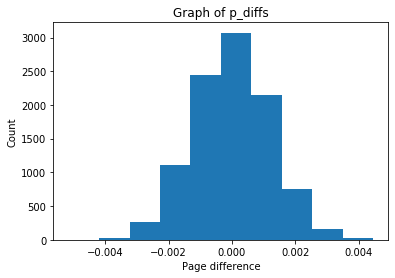

In [23]:
p_diffs=np.array(p_diffs)
#histogram of p_diff
plt.hist(p_diffs)
plt.title('Graph of p_diffs')#title of graphs
plt.xlabel('Page difference') # x-label of graphs
plt.ylabel('Count') # y-label of graphs
plt.axvline(x= obs_diff, color= 'r')

What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv?

In [25]:
var1 = df2[df2['landing_page'] == 'new_page']
var1=var1['converted'].mean()
var2 = df2[df2['landing_page'] == 'old_page']
var2 = var2['converted'].mean()
actual_diff = var1-var2
count = 0
for i in p_diffs:
    if i> actual_diff:
        count = count+1
        
print (count/(len(p_diffs)))

0.9063


 Explain what you just computed in previous part. What is this value called in scientific studies? What does this value mean in terms of whether or not there is a difference between the new and old pages?

The n_old and n_new refer to the number of rows associated with the old page and new pages, respectively.

In [26]:
import statsmodels.api as sm

# who converted from old to new
old_converted = len(df2.query('converted==1 and landing_page=="old_page"'))
# who converted from new to old
new_converted = len(df2.query('converted==1 and landing_page=="new_page"'))
#rows_associated with users who landed on old_page
n_old = len(df2.query('landing_page=="old_page"'))
#rows_associated with users who landed on new_page
n_new = len(df2.query('landing_page=="new_page"'))
n_new

145310

Now use stats.proportions_ztest to compute your test statistic and p-value. Here is a helpful link on using the built in

In [27]:
#Computing z_score and p_value
z_score, p_value = sm.stats.proportions_ztest([old_converted,new_converted], [n_old, n_new],alternative='smaller') 

#display z_score and p_value
print(z_score,p_value)

1.3109241984234394 0.9050583127590245


In [29]:
# norm shows how significant our z_score is
from scipy.stats import norm
norm.cdf(z_score)

0.9050583127590245

In [30]:
#critical value of 95% confidence
norm.ppf(1-(0.05))

1.6448536269514722

Section Conclusion

z_score is less than critical value of 95% confidence. Hence we fail to reject null hypothesis. Therefore we accept null hypothesis.

## Part III Regression

###### In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

###### The goal is to use statsmodels to fit the regression model you specified in part a. to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received. Add an intercept column, as well as an ab_page column, which is 1 when an individual receives the treatment and 0 if control.

In [33]:
# adding an intercept column
df2['intercept'] = 1

df2.head(3)

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   

   intercept  ab_page  
0          1        0  
1          1        0  
2          1        1

In [34]:
# intercept column was amened to ensure control group has intercept value of 0
df2.loc[(df2['group']== 'control'),'intercept'] = 0
df2

user_id                   timestamp      group landing_page  \
0        851104  2017-01-21 22:11:48.556739    control     old_page   
1        804228  2017-01-12 08:01:45.159739    control     old_page   
2        661590  2017-01-11 16:55:06.154213  treatment     new_page   
3        853541  2017-01-08 18:28:03.143765  treatment     new_page   
4        864975  2017-01-21 01:52:26.210827    control     old_page   
...         ...                         ...        ...          ...   
294473   751197  2017-01-03 22:28:38.630509    control     old_page   
294474   945152  2017-01-12 00:51:57.078372    control     old_page   
294475   734608  2017-01-22 11:45:03.439544    control     old_page   
294476   697314  2017-01-15 01:20:28.957438    control     old_page   
294477   715931  2017-01-16 12:40:24.467417  treatment     new_page   

        converted  intercept  ab_page  
0               0          0        0  
1               0          0        0  
2               0          1        1  
3               0          1        1  
4               1          0        0  
...           ...        ...      ...  
294473          0          0        0  
294474          0          0        0  
294475          0          0        0  
294476          0          0        0  
294477          0          1        1  

[290584 rows x 7 columns]

In [35]:
#Create dummy variable column
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

###### Use statsmodels to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part b. to predict whether or not an individual converts.

In [82]:
import statsmodels.api as sm
model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
model

In [51]:
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.528825
         Iterations 6


LinAlgError: Singular matrix

In [81]:
model.summary()

AttributeError: 'Logit' object has no attribute 'summary'

###### What is the p-value associated with ab_page? Why does it differ from the value you found in Part II?

###### Hint: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in Part II?

The p-value might differ because in null hypothesis of the project the differecne between pnew and pold is less or equal to 0 and alternative hypotehsis is greater than 0.
However, in null hypothesis of the regression model the difference between pnew and pold is only eqeal to 0 and alternative hypothesis is that it does not equal to 0.

The definition of Click Through Rate (CTR) = The number of unique visitors who click at least once divided by unique visitors who view the page

Thus, the null hypothesis of the project is CTR differenece (new-old) <= 0 and an alternative hypothesis of the project is CTR difference (new-old) > 0.

###### Now, you are considering other things that might influence whether or not an individual converts. Discuss why it is a good idea to consider other factors to add into your regression model. Are there any disadvantages to adding additional terms into your regression model?

###### Q: Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the countries.csv dataset and merge together your datasets on the appropriate rows. Here are the docs for joining tables.

###### Does it appear that country had an impact on conversion? Don't forget to create dummy variables for these country columns - Hint: You will need two columns for the three dummy variables. Provide the statistical output as well as a written response to answer this question.

In [55]:
# Store countries.csv data in dataframe
countries = pd.read_csv('countries.csv')
countries.head()

user_id country
0   834778      UK
1   928468      US
2   822059      UK
3   711597      UK
4   710616      UK

In [56]:
#Inner join both dataframes
new_df = countries.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
new_df.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  
user_id                                 
834778           0          0        0  
928468           0          1        1  
822059           1          1        1  
711597           0          0        0  
710616           0          1        1

In [60]:
# Check number of countries within new_df
new_df['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [61]:
#adding dummy variables with 'CA' as the baseline
new_df[['US', 'UK']] = pd.get_dummies(new_df['country'])[['US', "UK"]]
new_df.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  US  UK  
user_id                                         
834778           0          0        0   0   1  
928468           0          1        1   1   0  
822059           1          1        1   0   1  
711597           0          0        0   0   1  
710616           0          1        1   0   1

In [64]:
new_df['US_ab_page'] = new_df['US']*new_df['ab_page']
new_df.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  US  UK  US_ab_page  
user_id                                                     
834778           0          0        0   0   1           0  
928468           0          1        1   1   0           1  
822059           1          1        1   0   1           0  
711597           0          0        0   0   1           0  
710616           0          1        1   0   1           0

In [65]:
new_df['UK_ab_page'] = new_df['UK']*new_df['ab_page']
new_df.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  US  UK  US_ab_page  UK_ab_page  
user_id                                                                 
834778           0          0        0   0   1           0           0  
928468           0          1        1   1   0           1           0  
822059           1          1        1   0   1           0           1  
711597           0          0        0   0   1           0           0  
710616           0          1        1   0   1           0           1

In [66]:
log_reg = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'US', 'UK', 'US_ab_page', 'US_ab_page']])
log_reg

###### Q. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.

###### Provide the summary results, and your conclusions based on the results.

In [69]:
#Check the result
result3 = log_reg.fit()
result3.summary()

Optimization terminated successfully.
         Current function value: 0.379150
         Iterations 6


C:\Users\Nouer\anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Nouer\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Nouer\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Nouer\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                -0.03559
Time:                        20:25:47   Log-Likelihood:            -1.1017e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.3915        nan        nan        nan         nan         nan
ab_page       -0.3916        nan        nan        nan         nan         nan
US            -1.9865      0.010   -206.344      0.000      -2.005      -1.968
UK            -1.6543      0.013   -126.949      0.000      -1.680      -1.629
US_ab_page     0.3812   1.99e+06   1.91e-07      1.000    -3.9e+06     3.9e+06
US_ab_page     0.3813   1.99e+06   1.91e-07      1.000    -3.9e+06     3.9e+06
==============================================================================
"""

Conclusion:

The p-values is not significant for any values. Thus, this project fails to reject the null hypothesis and conclude that there is not sufficient evidence to suggest that there is an interaction between country and page received that will predict whether a user converts or not. In addition to that, we do not have sufficient proof to suggest that the new page results in more conversions than the old page.